In [ ]:
%matplotlib inline


# Embedding ERP EEG data in 2D Euclidean space with Laplacian Eigenmaps


Spectral embedding via Laplacian Eigenmaps of a set of ERP data.




In [1]:
# Authors: Pedro Rodrigues <pedro.rodrigues01@gmail.com>
#
# License: BSD (3-clause)

import numpy as np

from pyriemann.estimation import XdawnCovariances
from pyriemann.embedding import Embedding

import mne
from mne import io
from mne.datasets import sample

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

print(__doc__)



C:\Users\nemrodov\AppData\Local\Continuum\anaconda3\envs\tensorenviron\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\nemrodov\AppData\Local\Continuum\anaconda3\envs\tensorenviron\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Automatically created module for IPython interactive environment


Set parameters and read data



In [39]:
data_path = 'C:\\Users\\nemrodov\\mne_data\\MNE-sample-data'
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
tmin, tmax = -0., 1
event_id = dict(aud_l=1, aud_r=2, vis_l=3, vis_r=4)

# Setup for reading the raw data
raw = io.Raw(raw_fname, preload=True, verbose=False)
raw.filter(2, None, method='iir')  # replace baselining with high-pass
events = mne.read_events(event_fname)

raw.info['bads'] = ['MEG 2443']  # set bad channels
picks = mne.pick_types(raw.info, meg=True, eeg=False, stim=False, eog=False,
                       exclude='bads')

# Read epochs
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
                    picks=picks, baseline=None, preload=True, verbose=False)

X = epochs.get_data()
y = epochs.events[:, -1]

Embedding the Xdawn covariance matrices with Laplacian Eigenmaps



In [16]:
nfilter = 4
xdwn = XdawnCovariances(estimator='scm', nfilter=nfilter)
split = train_test_split(X, y, train_size=0.25, random_state=42)
Xtrain, Xtest, ytrain, ytest = split
covs = xdwn.fit(Xtrain, ytrain).transform(Xtest)

lapl = Embedding(metric='riemann', n_components=2)
embd = lapl.fit_transform(covs)

Plot the three first components of the embedded points



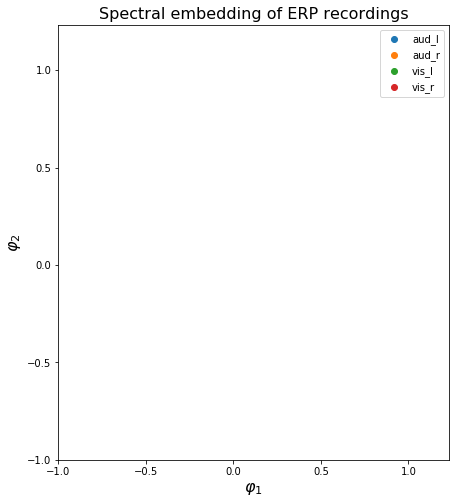

In [95]:
fig, ax = plt.subplots(figsize=(7, 8), facecolor='white')

for cond, label in event_id.items():
    idx = (ytest == label)
    ax.scatter(embd[idx, 0], embd[idx, 1], s=36, label=cond)

ax.set_xlabel(r'$\varphi_1$', fontsize=16)
ax.set_ylabel(r'$\varphi_2$', fontsize=16)
ax.set_title('Spectral embedding of ERP recordings', fontsize=16)
ax.set_xticks([-1.0, -0.5, 0.0, +0.5, 1.0])
ax.set_yticks([-1.0, -0.5, 0.0, +0.5, 1.0])
ax.grid(False)
ax.legend()
plt.show()

In [97]:
path = 'C:\\Users\\nemrodov\\Documents\\Ilya_study\\Analysis\\S05_perc_aver-epo.fif'
epochs = mne.read_epochs(path)

Reading C:\Users\nemrodov\Documents\Ilya_study\Analysis\S05_perc_aver-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     995.00 ms
        0 CTF compensation matrices available
1200 matching events found
Applying baseline correction (mode: mean)
1200 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [98]:
X=epochs['101','102','103','104','105','106','107','108'].get_data()[:,:,:]
y = epochs['101','102','103','104','105','106','107','108'].events[:, -1]

In [103]:
nfilter = 4
xdwn = XdawnCovariances(estimator='scm', nfilter=nfilter)
split = train_test_split(X, y, train_size=0.50, random_state=2)
Xtrain, Xtest, ytrain, ytest = split
covs = xdwn.fit(Xtrain, ytrain).transform(Xtest)

lapl = Embedding(metric='riemann', n_components=2)
embd = lapl.fit_transform(covs)

In [104]:
embd.shape

(48, 2)

In [105]:
y.shape

(96,)

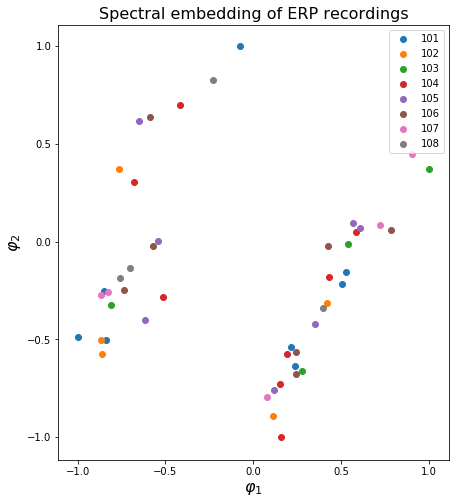

In [106]:
fig, ax = plt.subplots(figsize=(7, 8), facecolor='white')
labels = [101,102,103,104,105,106,107,108]
for i in labels:
    idx = (ytest == i)
    ax.scatter(embd[idx, 0], embd[idx, 1], s=36, label=i)

ax.set_xlabel(r'$\varphi_1$', fontsize=16)
ax.set_ylabel(r'$\varphi_2$', fontsize=16)
ax.set_title('Spectral embedding of ERP recordings', fontsize=16)
ax.set_xticks([-1.0, -0.5, 0.0, +0.5, 1.0])
ax.set_yticks([-1.0, -0.5, 0.0, +0.5, 1.0])
ax.grid(False)
ax.legend()
plt.show()

In [67]:
ytest

array([104, 101, 103, 104, 101, 102, 101, 104, 101, 102, 101, 104, 103,
       104, 102, 102, 102, 102, 104, 102, 101, 102, 101, 103])